In [730]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score

In [731]:
train = pd.read_csv("C:\\Users\\Deepak\\Downloads\\Titanic_train.csv")
test = pd.read_csv("C:\\Users\\Deepak\\Downloads\\Titanic_test.csv")
test_file = test

In [732]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [733]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [734]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Removing unnecessary columns

In [735]:
cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_subset = train.drop(cols, axis = 1)
test_subset = test.drop(cols, axis = 1)

In [736]:
train_subset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Convert categorical columns to some numerical value

In [737]:
train_subset.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [738]:
print(train_subset.Sex.value_counts())
print(train_subset.Embarked.value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [739]:
test_subset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [740]:
test_subset.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [741]:
print(test_subset.Sex.value_counts())
print(test_subset.Embarked.value_counts())

male      266
female    152
Name: Sex, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [742]:
cleanup_nums = {
                "Embarked":{"S": 0, "C": 1, "Q": 2},
                "Sex": {"male": 0, "female" : 1}
               }
train_subset.replace(cleanup_nums, inplace=True)
test_subset.replace(cleanup_nums, inplace=True)

In [743]:
print(train_subset.Sex.value_counts()) 
print(train_subset.Embarked.value_counts())
#Everthing correctly replaced

0    577
1    314
Name: Sex, dtype: int64
0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64


In [744]:
print(test_subset.Sex.value_counts())  
print(test_subset.Embarked.value_counts())
#Everthing correctly replaced

0    266
1    152
Name: Sex, dtype: int64
0    270
1    102
2     46
Name: Embarked, dtype: int64


#### Filling Missing Values and converting to appropriate types

In [745]:
train_subset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [746]:
embarked_median = train_subset.Embarked.median()
age_mean = train_subset.Age.mean()
train_subset.Age = train_subset.Age.fillna(age_mean)
train_subset.Embarked = train_subset.Embarked.fillna(embarked_median)
train_subset['Embarked'] = train_subset['Embarked'].astype(int)

In [747]:
train_subset.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [748]:
train_subset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [749]:
train_subset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [750]:
test_subset.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [751]:
fare_median = test_subset.Fare.median()
age_mean = test_subset.Age.mean()
test_subset.Age = test_subset.Age.fillna(age_mean)
test_subset.Fare = test_subset.Fare.fillna(fare_median)
test_subset['Embarked'] = test_subset['Embarked'].astype(int)

In [752]:
test_subset.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [753]:
test_subset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


### Now we have clean data, but variance is high

In [754]:
train_subset.var()

Survived       0.236772
Pclass         0.699015
Sex            0.228475
Age          169.052400
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
Embarked       0.404081
dtype: float64

In [755]:
ss = StandardScaler()
train_scaled = pd.DataFrame(ss.fit_transform(train_subset), columns = train_subset.columns)
print(train_scaled.var())
train_scaled.head()

Survived    1.001124
Pclass      1.001124
Sex         1.001124
Age         1.001124
SibSp       1.001124
Parch       1.001124
Fare        1.001124
Embarked    1.001124
dtype: float64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.789272,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445,-0.568837
1,1.266990,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845,1.005181
2,1.266990,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854,-0.568837
3,1.266990,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730,-0.568837
4,-0.789272,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337,-0.568837


In [756]:
test_subset.var()

Pclass         0.708690
Sex            0.231960
Age          159.631454
SibSp          0.804178
Parch          0.963203
Fare        3119.233971
Embarked       0.469932
dtype: float64

In [757]:
ss = StandardScaler()
test_scaled = pd.DataFrame(ss.fit_transform(test_subset), columns = test_subset.columns)
print(test_scaled.var())
test_scaled.head()

Pclass      1.002398
Sex         1.002398
Age         1.002398
SibSp       1.002398
Parch       1.002398
Fare        1.002398
Embarked    1.002398
dtype: float64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.873482,-0.755929,0.334993,-0.499470,-0.400248,-0.497413,2.243165
1,0.873482,1.322876,1.325530,0.616992,-0.400248,-0.512278,-0.677841
2,-0.315819,-0.755929,2.514175,-0.499470,-0.400248,-0.464100,2.243165
3,0.873482,-0.755929,-0.259330,-0.499470,-0.400248,-0.482475,-0.677841
4,0.873482,1.322876,-0.655545,0.616992,0.619896,-0.417492,-0.677841


#### At this point, We have our train data in train_scaled and test data in test_scaled

In [758]:
X = train_scaled.drop(['Survived'], axis = 1)  #After pca, this will be used as X_train
y_train = train_scaled['Survived']  # This will be used as y_train

### Applying PCA to reduce dimensionality

In [759]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))

[0.25666146 0.49682917 0.65241494 0.76757612 0.86970136 0.949007
 1.        ]


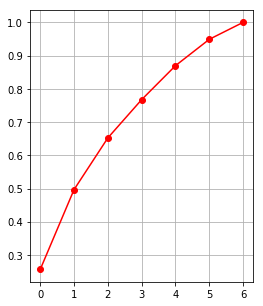

In [760]:
plt.figure(figsize=(4,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()
plt.show()

Most of the variance can be explained by 6 components, hence considering 6 as the base value

In [761]:
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X)
print(X.shape)
print(X_train.shape)
print(y_train.shape)

(891, 7)
(891, 6)
(891,)


In [762]:
pca = PCA(n_components = 6)
X_test = pca.fit_transform(test_scaled)   # Setting X_test post PCA
print(test_scaled.shape)
print(X_test.shape)

(418, 7)
(418, 6)


In [763]:
# Since we have continous values in y_train, hence it needs to be encoded first
y_train.head()

0   -0.789272
1    1.266990
2    1.266990
3    1.266990
4   -0.789272
Name: Survived, dtype: float64

In [764]:
lab_enc = preprocessing.LabelEncoder()
y_train = pd.DataFrame(lab_enc.fit_transform(y_train), columns = ['Survived'])
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Applying different models to check which is best fitting the problem and using Cross Validation

In [765]:
neighbours = np.arange(1,21)
scores = np.empty(len(neighbours))
for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores[i-1] = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy'))

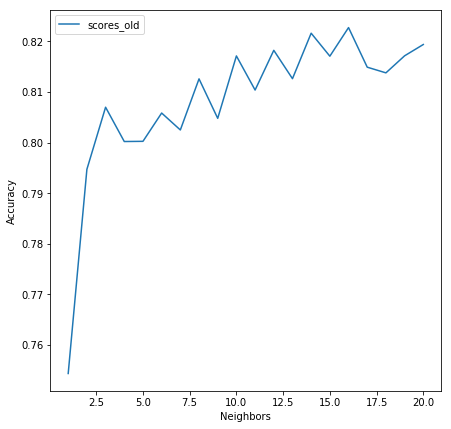

In [766]:
plt.figure(figsize=(7,7))
plt.plot(neighbours, scores, label = 'scores_old')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Above chart shows that considering value of k as 16 gives the best accuracy

In [767]:
#Logistic Regression

logreg = LogisticRegression()
print(np.mean(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')))

0.7968865622517307


In [768]:
#Support Vector Machine

svm = svm.SVC(kernel='linear', C=1, gamma=1)
print(np.mean(cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')))

0.7866981613891727


In [769]:
#Knn Classifer

Knn = KNeighborsClassifier(n_neighbors = 16)
print(np.mean(cross_val_score(Knn, X_train, y_train, cv=10, scoring='accuracy')))

0.8227176256951537


In [770]:
#Random Forest Classifier

RFC = RandomForestClassifier(n_estimators=100)
print(np.mean(cross_val_score(RFC, X_train, y_train, cv=10, scoring='accuracy')))

0.7879602201793212


#### KNN is performing well, hence we will use this model to predict the target variable on test set

In [771]:
#Knn Classifer

Knn_model = KNeighborsClassifier(n_neighbors = 16)
Knn_model.fit(X_train, y_train)
Predictions = Knn_model.predict(X_test)
Predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [772]:
KnnOutput = test_file.loc[:, ['PassengerId']]
KnnOutput['Survived'] = Predictions
KnnOutput.head()
KnnOutput.to_csv('C:\\Users\\Deepak\\Downloads\\out.csv', index=False)